In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
import os, os.path 
import numpy 
import pickle
from glob import glob
import torch.nn as nn
import torch.nn.functional as F
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict
"""
    number of trajectories in each city
    # austin --  train: 43041 test: 6325 
    # miami -- train: 55029 test:7971
    # pittsburgh -- train: 43544 test: 6361
    # dearborn -- train: 24465 test: 3671
    # washington-dc -- train: 25744 test: 3829
    # palo-alto -- train:  11993 test:1686

    trajectories sampled at 10HZ rate, input 5 seconds, output 6 seconds
    
"""

'\n    number of trajectories in each city\n    # austin --  train: 43041 test: 6325 \n    # miami -- train: 55029 test:7971\n    # pittsburgh -- train: 43544 test: 6361\n    # dearborn -- train: 24465 test: 3671\n    # washington-dc -- train: 25744 test: 3829\n    # palo-alto -- train:  11993 test:1686\n\n    trajectories sampled at 10HZ rate, input 5 seconds, output 6 seconds\n    \n'

In [2]:
device = 'cpu'

In [3]:
from glob import glob
import pickle5
import numpy as np

ROOT_PATH = "C:/Users/Administrator/cse151b-spring2022/argo2/"

cities = ["austin", "miami", "pittsburgh", "dearborn", "washington-dc", "palo-alto"]
splits = ["train", "test"]

def get_city_trajectories(city="palo-alto", split="train", normalized=False):
    f_in = ROOT_PATH + split + "/" + city + "_inputs"
    inputs = pickle5.load(open(f_in, "rb"))
    inputs = np.asarray(inputs)
    
    outputs = None
    
    if split=="train":
        f_out = ROOT_PATH + split + "/" + city + "_outputs"
        outputs = pickle5.load(open(f_out, "rb"))
        outputs = np.asarray(outputs)

        return torch.from_numpy(inputs).float(), torch.from_numpy(outputs).long()

    if split=="test":
    
        return torch.from_numpy(inputs).float(), torch.from_numpy(np.array([]))

    

class ArgoverseDataset(Dataset):
    """Dataset class for Argoverse"""
    def __init__(self, city: str, split:str, transform=None, device='cpu'):
        super(ArgoverseDataset, self).__init__()
        self.transform = transform

        self.inputs, self.outputs = get_city_trajectories(city=city, split=split, normalized=False)
        self.inputs = self.inputs.to(device)
        self.outputs = self.outputs.to(device)
    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):

        data = (self.inputs[idx], self.outputs[idx])
            
        if self.transform:
            data = self.transform(data)

        return data

# intialize a dataset
city = 'palo-alto' 
split = 'train'
train_dataset  = ArgoverseDataset(city = city, split = split, device=device)

In [4]:
austin = ArgoverseDataset(city ='austin', split = 'train')
miami = ArgoverseDataset(city ='miami', split = 'train')
pittsburgh =ArgoverseDataset(city ='pittsburgh', split = 'train')
dearborn = ArgoverseDataset(city ='dearborn', split = 'train')
washingtondc = ArgoverseDataset(city ='washington-dc', split = 'train')
paloalto = ArgoverseDataset(city ='palo-alto', split = 'train')

In [5]:
austin_test = ArgoverseDataset(city ='austin', split = 'test')
miami_test = ArgoverseDataset(city ='miami', split = 'test')
pittsburgh_test =ArgoverseDataset(city ='pittsburgh', split = 'test')
dearborn_test = ArgoverseDataset(city ='dearborn', split = 'test')
washingtondc_test = ArgoverseDataset(city ='washington-dc', split = 'test')
paloalto_test = ArgoverseDataset(city ='palo-alto', split = 'test')

In [6]:
len(austin), len(austin_test)

(43041, 6325)

In [7]:
len(miami), len(miami_test)

(55029, 7971)

In [8]:
len(pittsburgh), len(pittsburgh_test)

(43544, 6361)

In [9]:
len(dearborn), len(dearborn_test)

(24465, 3671)

In [10]:
len(washingtondc), len(washingtondc_test)

(25744, 3829)

In [11]:
len(paloalto), len(paloalto_test)

(11993, 1686)

### Change in Position over period

In [12]:
austin_changes_x = []
austin_changes_y = []
for i in austin:
    change = i[0][0] - i[0][-1] 
    change_x = change[0].item()
    change_y = change[1].item()
    austin_changes_x.append(change_x)
    austin_changes_y.append(change_y)

In [13]:
miami_changes_x = []
miami_changes_y = []
for i in miami:
    change = i[0][0] - i[0][-1] 
    change_x = change[0].item()
    change_y = change[1].item()
    miami_changes_x.append(change_x)
    miami_changes_y.append(change_y)

In [14]:
pittsburgh_changes_x = []
pittsburgh_changes_y = []
for i in pittsburgh:
    change = i[0][0] - i[0][-1] 
    change_x = change[0].item()
    change_y = change[1].item()
    pittsburgh_changes_x.append(change_x)
    pittsburgh_changes_y.append(change_y)

In [15]:
dearborn_changes_x = []
dearborn_changes_y = []
for i in dearborn:
    change = i[0][0] - i[0][-1] 
    change_x = change[0].item()
    change_y = change[1].item()
    dearborn_changes_x.append(change_x)
    dearborn_changes_y.append(change_y)

In [16]:
washingtondc_changes_x = []
washingtondc_changes_y = []
for i in washingtondc:
    change = i[0][0] - i[0][-1] 
    change_x = change[0].item()
    change_y = change[1].item()
    washingtondc_changes_x.append(change_x)
    washingtondc_changes_y.append(change_y)

In [17]:
paloalto_changes_x = []
paloalto_changes_y = []
for i in paloalto:
    change = i[0][0] - i[0][-1] 
    change_x = change[0].item()
    change_y = change[1].item()
    paloalto_changes_x.append(change_x)
    paloalto_changes_y.append(change_y)

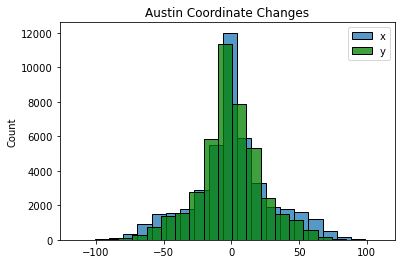

In [18]:
sns.histplot(austin_changes_x, bins=20), sns.histplot(austin_changes_y, bins=20, color='green').set(title='Austin Coordinate Changes')
plt.legend('xy')
plt.savefig('figures/austin_changes.jpg')

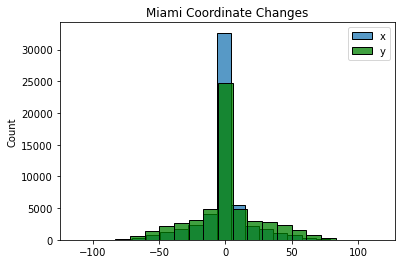

In [19]:
sns.histplot(miami_changes_x, bins=20), sns.histplot(miami_changes_y, bins=20, color='green').set(title='Miami Coordinate Changes')
plt.legend('xy')
plt.savefig('figures/miami_changes.jpg')

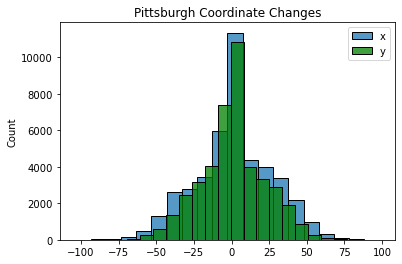

In [20]:
sns.histplot(pittsburgh_changes_x, bins=20), sns.histplot(pittsburgh_changes_y, bins=20, color='green').set(title='Pittsburgh Coordinate Changes')
plt.legend('xy')
plt.savefig('figures/pittsburgh_changes.jpg')

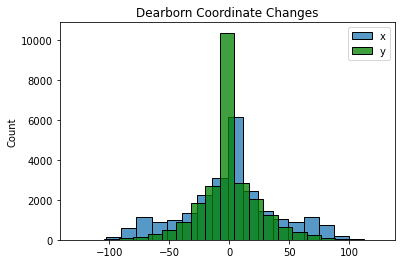

In [21]:
sns.histplot(dearborn_changes_x, bins=20), sns.histplot(dearborn_changes_y, bins=20, color='green').set(title='Dearborn Coordinate Changes')
plt.legend('xy')
plt.savefig('figures/dearborn_changes.jpg')

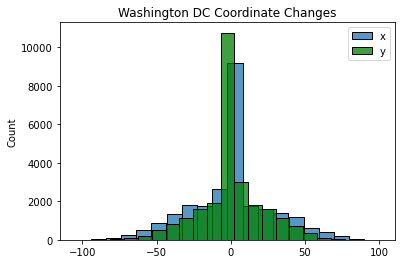

In [22]:
sns.histplot(washingtondc_changes_x, bins=20), sns.histplot(washingtondc_changes_y, bins=20, color='green').set(title='Washington DC Coordinate Changes')
plt.legend('xy')
plt.savefig('figures/washingtondc_changes.jpg')

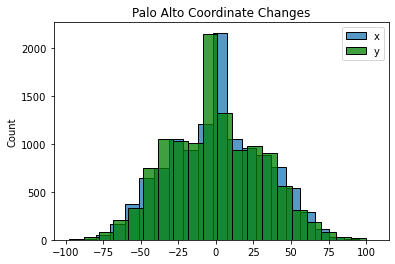

In [23]:
sns.histplot(paloalto_changes_x, bins=20), sns.histplot(paloalto_changes_y, bins=20, color='green').set(title='Palo Alto Coordinate Changes')
plt.legend('xy')
plt.savefig('figures/paloalto_changes.jpg')

In [24]:
def heatmapper(city, sample_num):

    input_coords = defaultdict(int)
    output_coords = defaultdict(int)
    # np.random.choice(range(len(paloalto_inputs)), 5000, replace=False)
    for i in np.random.choice(range(len(city)), sample_num, replace=False):
        input_ex, output_ex = pd.DataFrame(np.array(city[i][0])), pd.DataFrame(np.array(city[i][1]))
        input_ex.columns ,output_ex.columns = ['x', 'y'], ['x', 'y']
        input_ex['exists'], output_ex['exists'] = pd.Series(np.ones(len(input_ex))), pd.Series(np.ones(len(output_ex)))
        
        input_ex['x'], output_ex['x'] = input_ex['x'].apply(lambda x: np.round(x, -2)), output_ex['x'].apply(lambda x: np.round(x, -2))
        input_ex['y'], output_ex['y'] = input_ex['y'].apply(lambda x: np.round(x, -2)), output_ex['y'].apply(lambda x: np.round(x, -2))
        
        for j in range(len(input_ex)):
            input_coords[(input_ex.iloc[j]['x'], input_ex.iloc[j]['y'])] += 1

        for k in range(len(output_ex)):
            output_coords[(output_ex.iloc[j]['x'], output_ex.iloc[j]['y'])] += 1

    input_df = pd.DataFrame(list(input_coords.keys()))
    input_df['count'] = list(input_coords.values())
    input_df.columns = ['x', 'y', 'count']

    output_df = pd.DataFrame(list(output_coords.keys()))
    output_df['count'] = list(output_coords.values())
    output_df.columns = ['x', 'y', 'count']


    
    return input_df, output_df

    

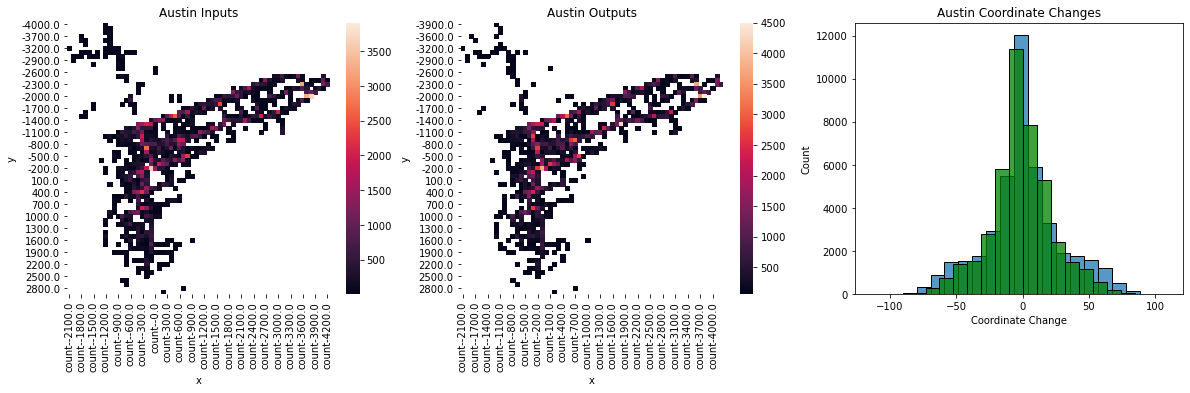

In [33]:
austin_inp, austin_out = heatmapper(austin, 5000)
fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
sns.heatmap(austin_inp.pivot('y', 'x'), ax=ax1).set(title='Austin Inputs', xlabel='x', )
sns.heatmap(austin_out.pivot('y', 'x'), ax=ax2).set(title='Austin Outputs', xlabel='x')
sns.histplot(austin_changes_x, bins=20, ax=ax3)
sns.histplot(austin_changes_y, bins=20, color='green', ax=ax3).set(title='Austin Coordinate Changes', xlabel='Coordinate Change')
plt.savefig('figures/austin_eda.jpg')

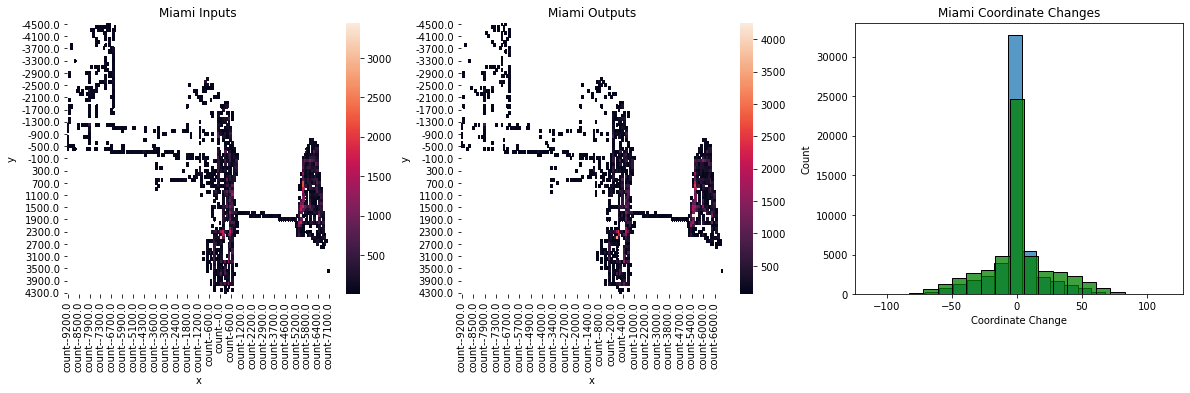

In [32]:
miami_inp, miami_out = heatmapper(miami, 5000)
fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
sns.heatmap(miami_inp.pivot('y', 'x'), ax=ax1).set(title='Miami Inputs', xlabel='x', )
sns.heatmap(miami_out.pivot('y', 'x'), ax=ax2).set(title='Miami Outputs', xlabel='x')
sns.histplot(miami_changes_x, bins=20, ax=ax3)
sns.histplot(miami_changes_y, bins=20, color='green', ax=ax3).set(title='Miami Coordinate Changes', xlabel='Coordinate Change')
plt.savefig('figures/miami_eda.jpg')

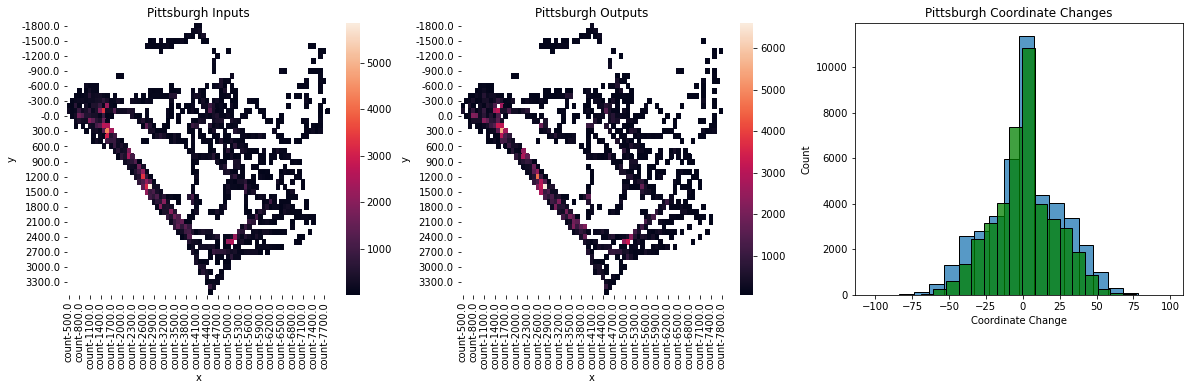

In [28]:
pittsburgh_in, pittsburgh_out = heatmapper(pittsburgh, 5000)
fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
sns.heatmap(pittsburgh_in.pivot('y', 'x'), ax=ax1).set(title='Pittsburgh Inputs', xlabel='x', )
sns.heatmap(pittsburgh_out.pivot('y', 'x'), ax=ax2).set(title='Pittsburgh Outputs', xlabel='x')
sns.histplot(pittsburgh_changes_x, bins=20, ax=ax3)
sns.histplot(pittsburgh_changes_y, bins=20, color='green', ax=ax3).set(title='Pittsburgh Coordinate Changes', xlabel='Coordinate Change')
plt.savefig('figures/pittsburgh_eda.jpg')

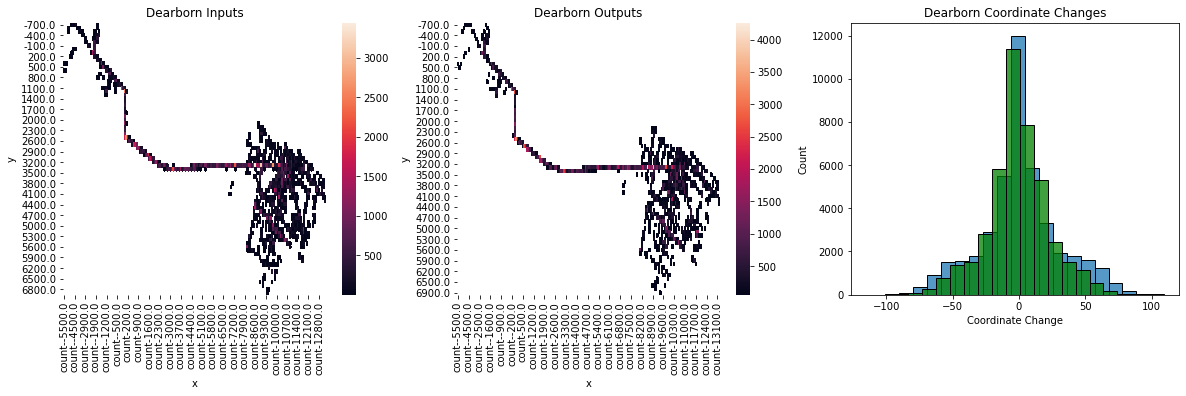

In [29]:
dearborn_inp, dearborn_out = heatmapper(dearborn, 5000)
fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
sns.heatmap(dearborn_inp.pivot('y', 'x'), ax=ax1).set(title='Dearborn Inputs', xlabel='x', )
sns.heatmap(dearborn_out.pivot('y', 'x'), ax=ax2).set(title='Dearborn Outputs', xlabel='x')
sns.histplot(austin_changes_x, bins=20, ax=ax3)
sns.histplot(austin_changes_y, bins=20, color='green', ax=ax3).set(title='Dearborn Coordinate Changes', xlabel='Coordinate Change')
plt.savefig('figures/dearborn_eda.jpg')

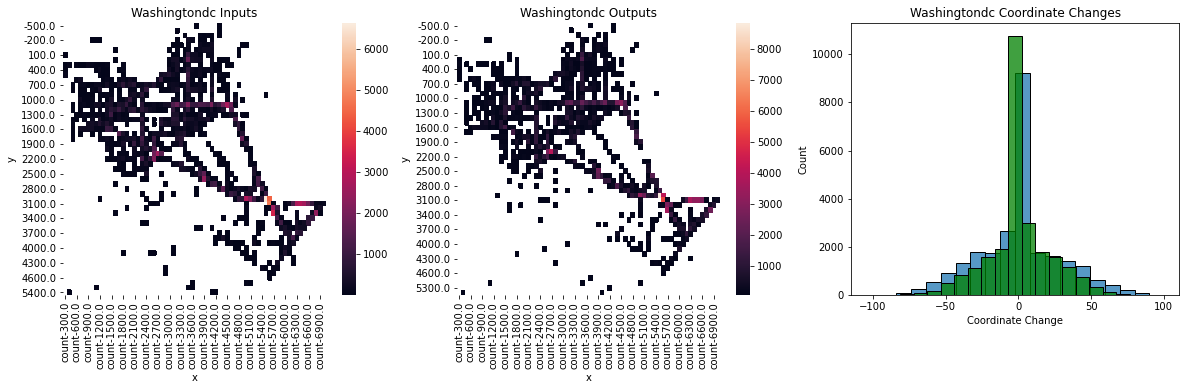

In [30]:
washingtondc_inp, washingtondc_out = heatmapper(washingtondc, 5000)
fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
sns.heatmap(washingtondc_inp.pivot('y', 'x'), ax=ax1).set(title='Washingtondc Inputs', xlabel='x', )
sns.heatmap(washingtondc_out.pivot('y', 'x'), ax=ax2).set(title='Washingtondc Outputs', xlabel='x')
sns.histplot(washingtondc_changes_x, bins=20, ax=ax3)
sns.histplot(washingtondc_changes_y, bins=20, color='green', ax=ax3).set(title='Washingtondc Coordinate Changes', xlabel='Coordinate Change')
plt.savefig('figures/washingtondc_eda.jpg')

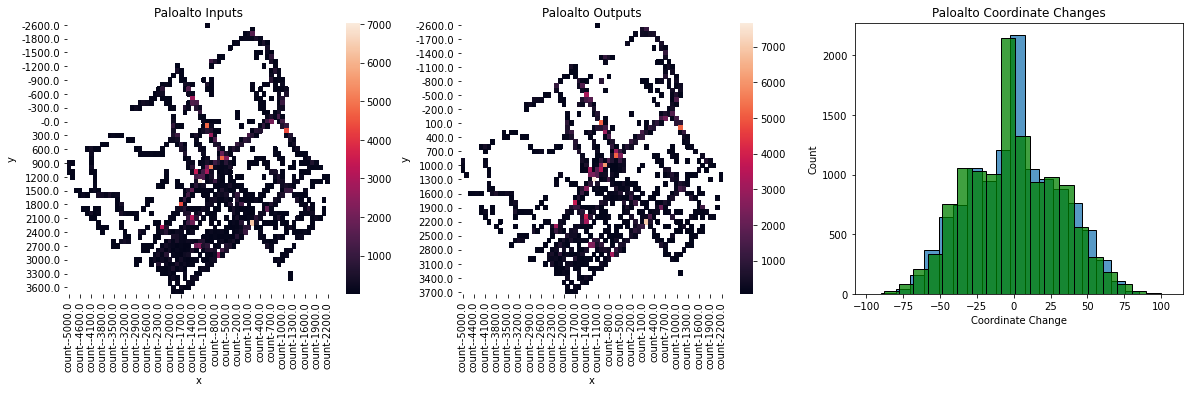

In [31]:
paloalto_inp, paloalto_out = heatmapper(paloalto, 5000)
fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
sns.heatmap(paloalto_inp.pivot('y', 'x'), ax=ax1).set(title='Paloalto Inputs', xlabel='x', )
sns.heatmap(paloalto_out.pivot('y', 'x'), ax=ax2).set(title='Paloalto Outputs', xlabel='x')
sns.histplot(paloalto_changes_x, bins=20, ax=ax3)
sns.histplot(paloalto_changes_y, bins=20, color='green', ax=ax3).set(title='Paloalto Coordinate Changes', xlabel='Coordinate Change')
plt.savefig('figures/paloalto_eda.jpg')